In [1]:
import os
import sys
import time
import shutil
import json
import tensorflow as tf

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../../'))
src_dir = os.path.join(project_dir, 'src')
data_dir = os.path.join(project_dir, 'data')
fig_dir = os.path.join(project_dir, 'fig')
logs_dir = os.path.join(project_dir, 'logs')
os.makedirs(fig_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)
os.makedirs(logs_dir, exist_ok=True)

# Add the src directory to sys.path
sys.path.append(src_dir)

import numpy as np

2026-01-05 21:10:50.934697: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-05 21:10:50.991207: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-05 21:10:51.844624: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Generating plots for 16 shadow models
Base directory: /storage/coda1/p-vzikas3/0/ywei368/Yu-Project/Auditing/lira_attack/logs/exp/cifar10
Epoch: 0000000100.npy

Processing: experiment-0_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=25233/50000
  IN (trained):  25233 samples, mean=11.5053, std=4.0623
  OUT (not trained): 24767 samples, mean=9.3116, std=6.3436


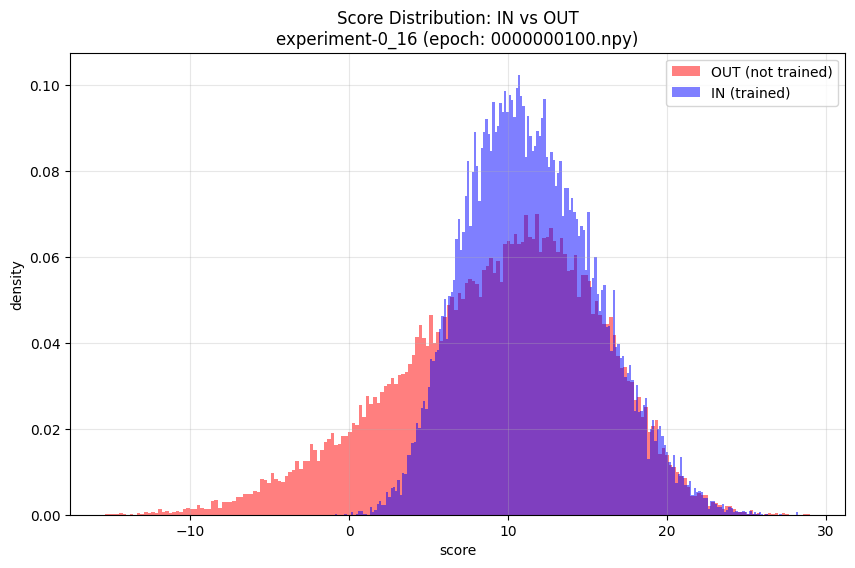

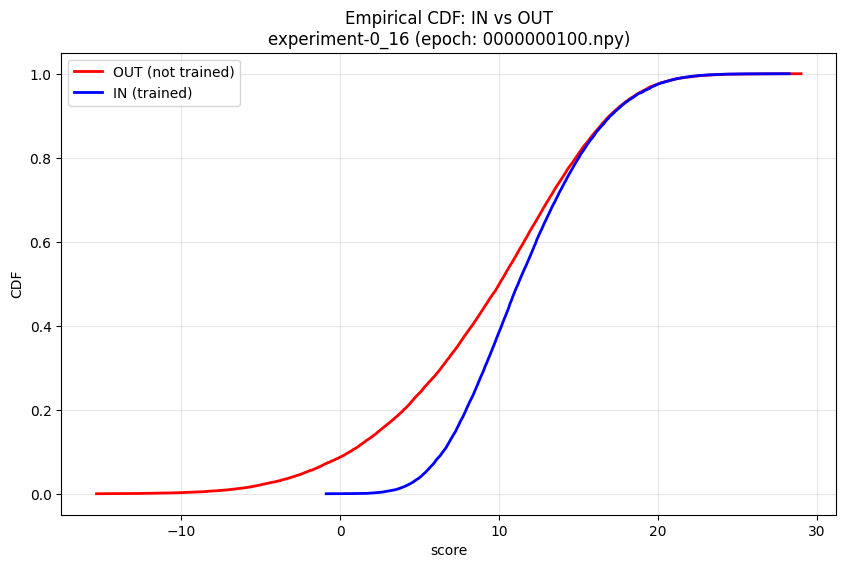


Processing: experiment-10_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=24880/50000
  IN (trained):  24880 samples, mean=10.9949, std=3.8966
  OUT (not trained): 25120 samples, mean=8.9825, std=6.0713


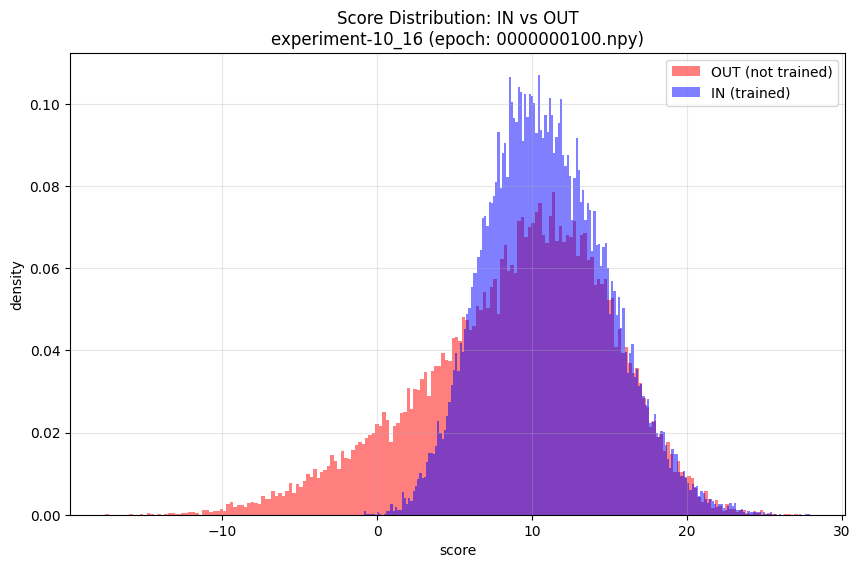

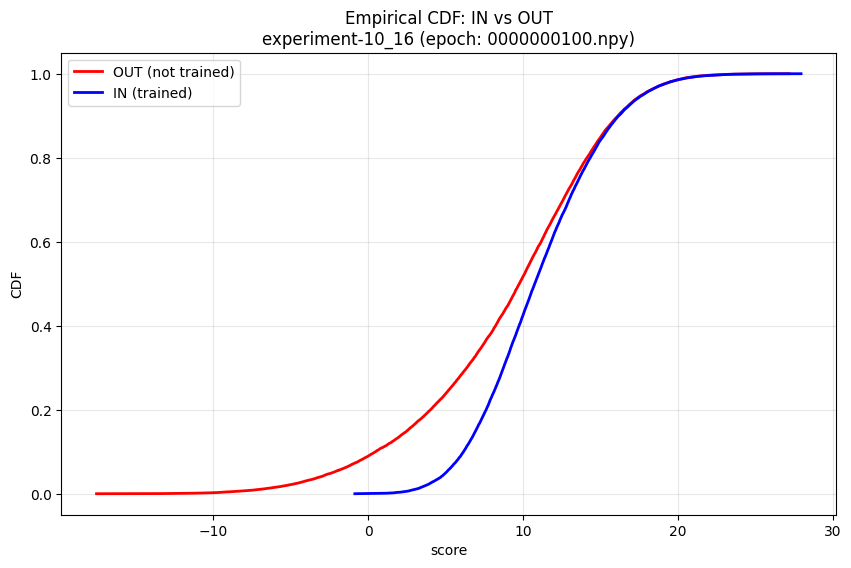


Processing: experiment-11_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=25110/50000
  IN (trained):  25110 samples, mean=11.2515, std=3.8994
  OUT (not trained): 24890 samples, mean=9.0768, std=6.2118


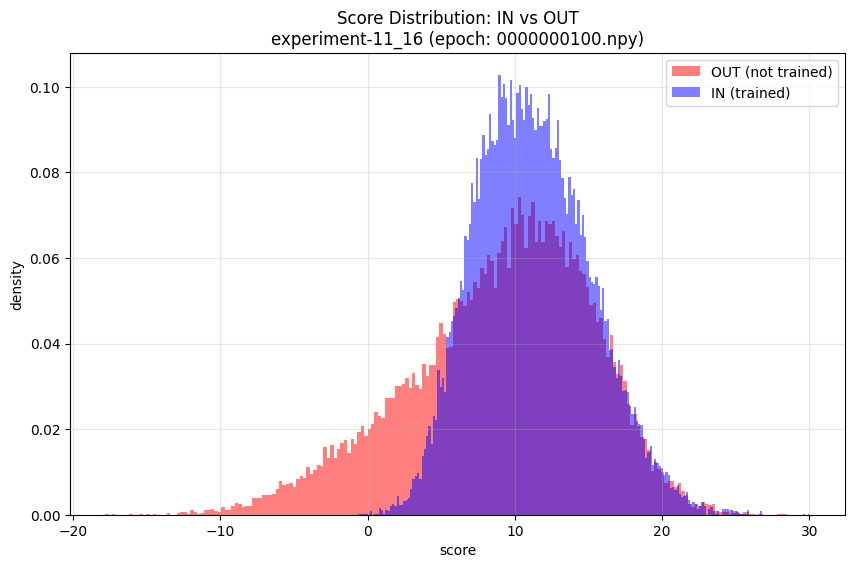

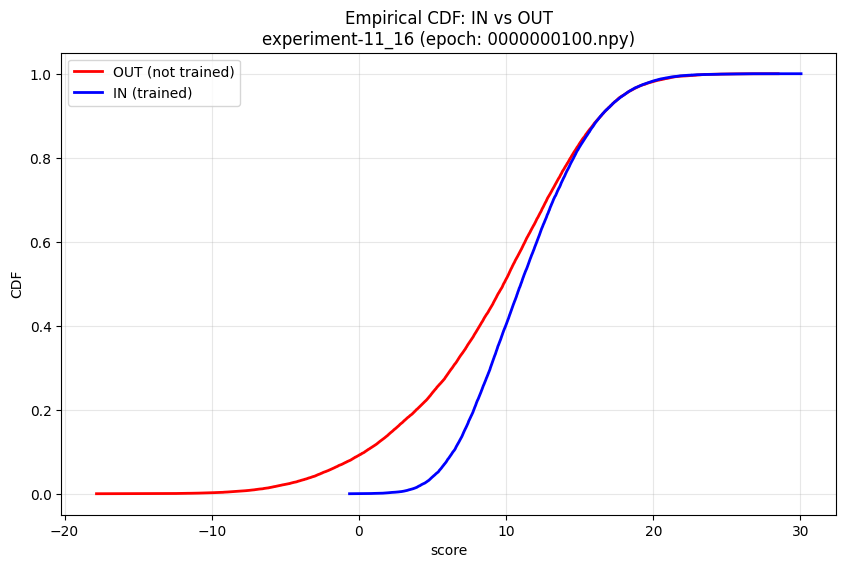


Processing: experiment-12_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=24835/50000
  IN (trained):  24835 samples, mean=11.1042, std=3.7568
  OUT (not trained): 25165 samples, mean=9.0082, std=6.0673


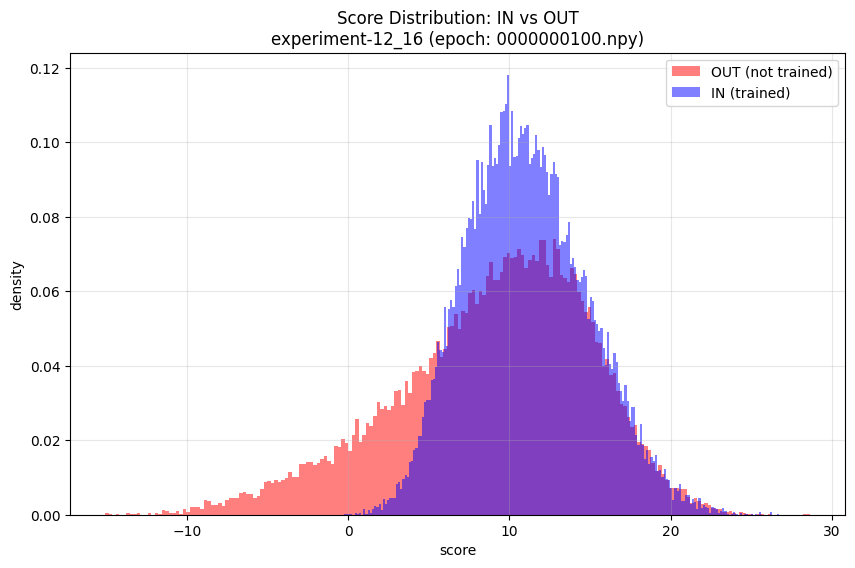

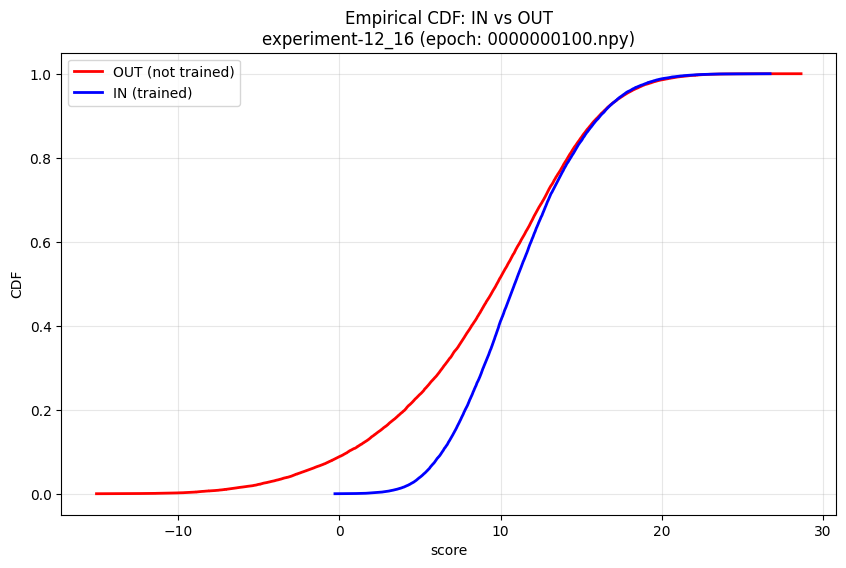


Processing: experiment-13_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=24907/50000
  IN (trained):  24907 samples, mean=11.2590, std=3.9230
  OUT (not trained): 25093 samples, mean=9.1497, std=6.2389


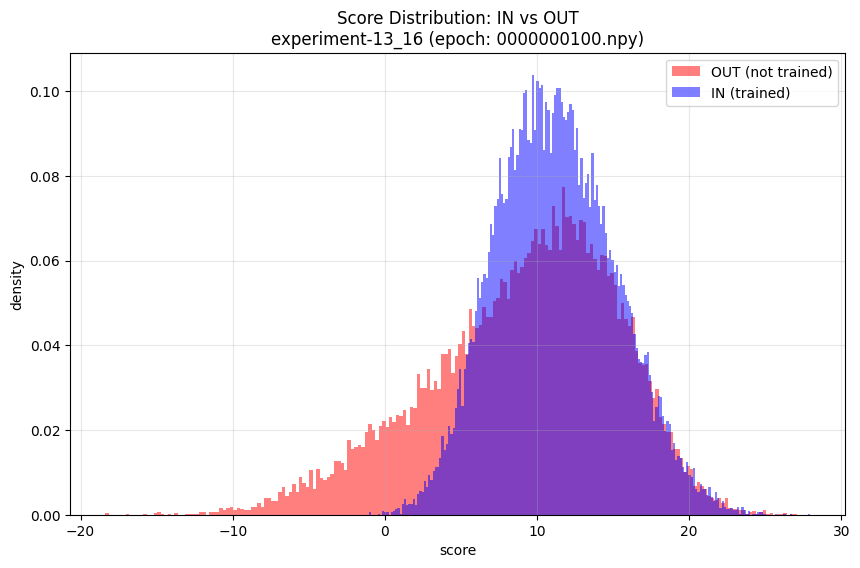

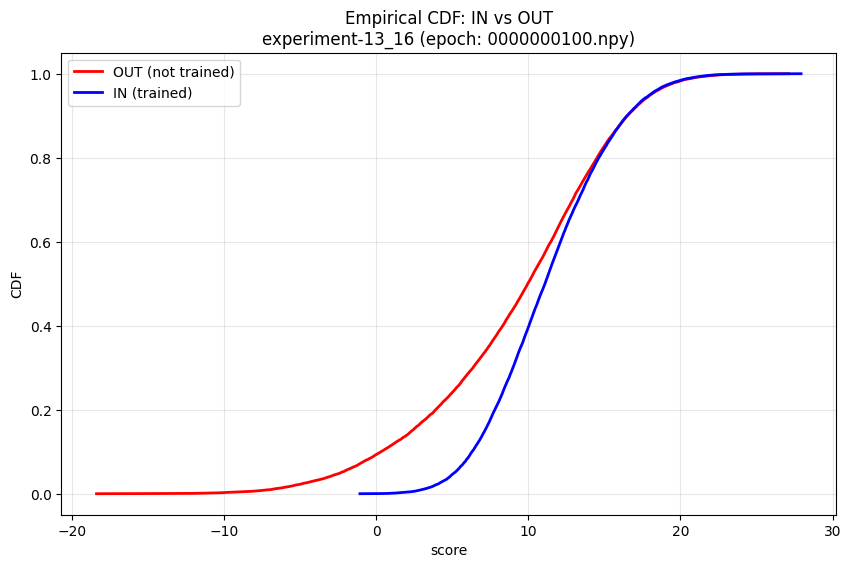


Processing: experiment-14_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=25085/50000
  IN (trained):  25085 samples, mean=11.2056, std=3.9895
  OUT (not trained): 24915 samples, mean=9.2134, std=6.2496


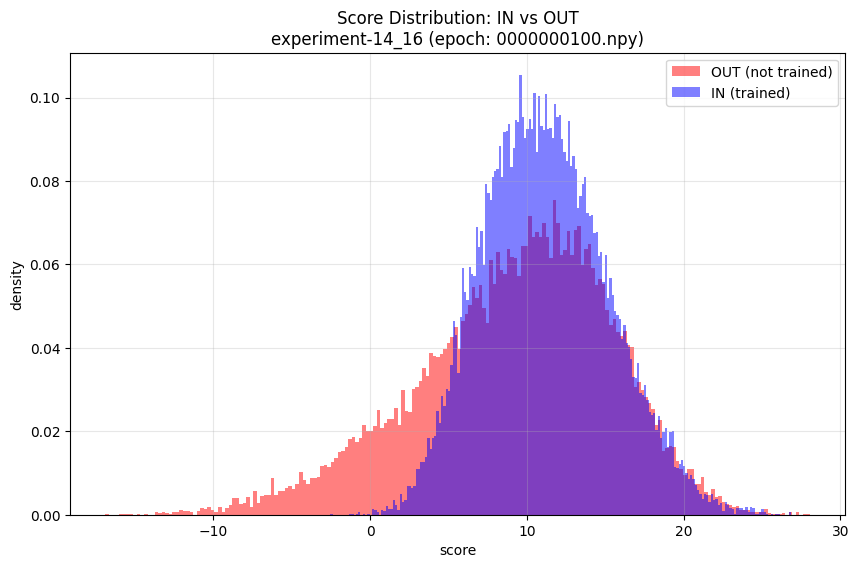

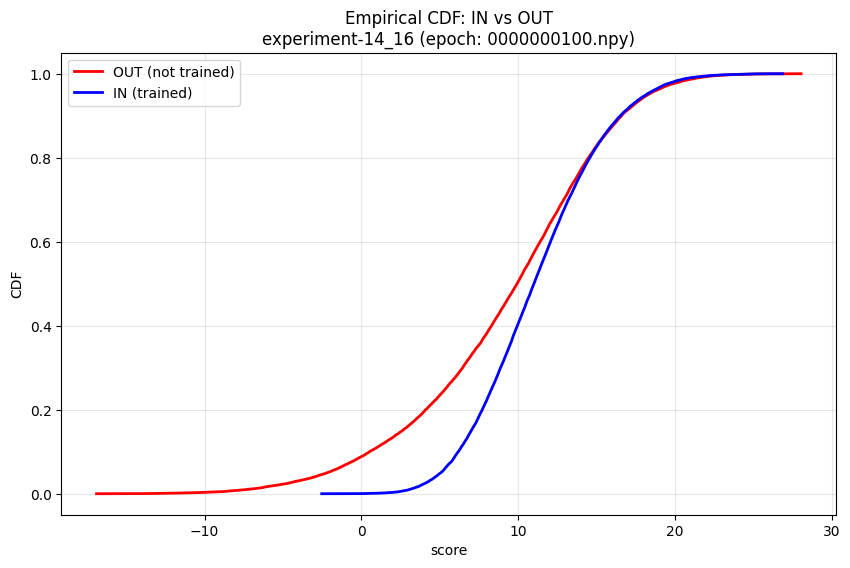


Processing: experiment-15_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=24820/50000
  IN (trained):  24820 samples, mean=11.1869, std=3.7227
  OUT (not trained): 25180 samples, mean=9.0541, std=6.0646


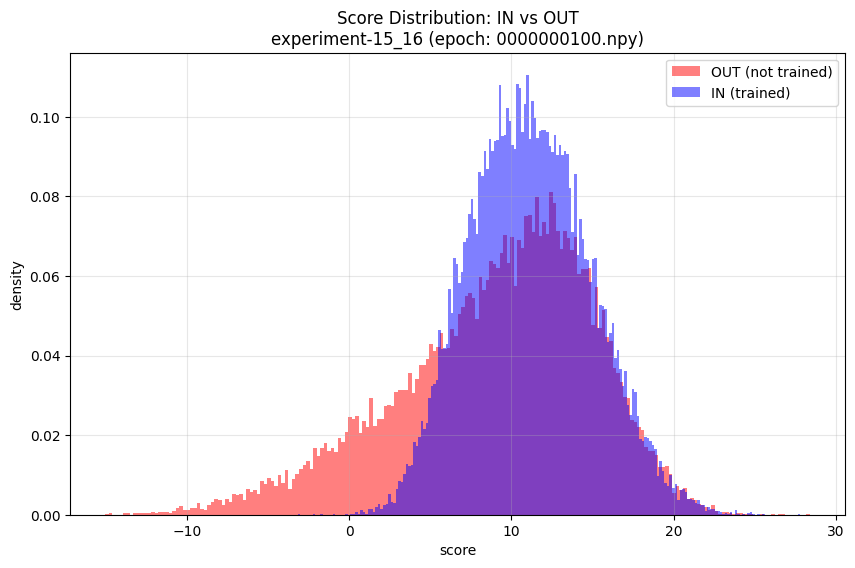

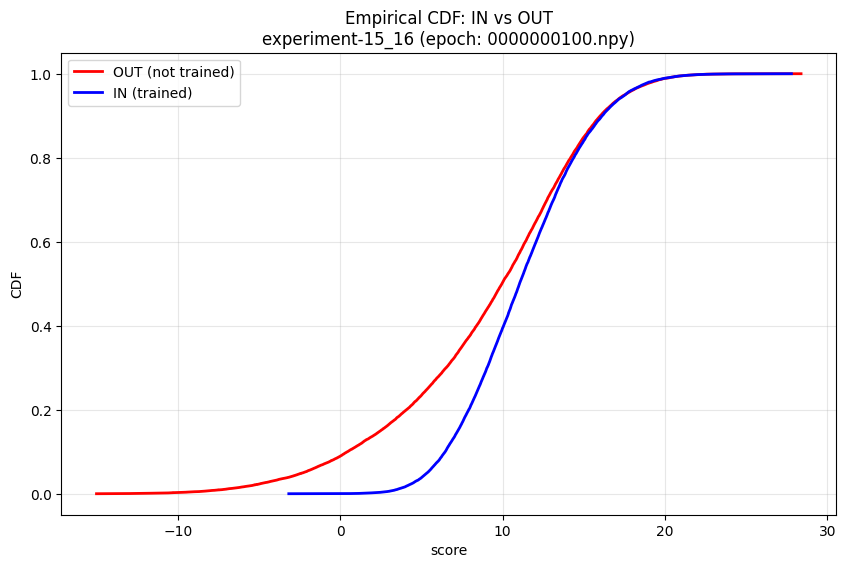


Processing: experiment-1_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=25046/50000
  IN (trained):  25046 samples, mean=11.3266, std=3.8533
  OUT (not trained): 24954 samples, mean=9.2517, std=6.0857


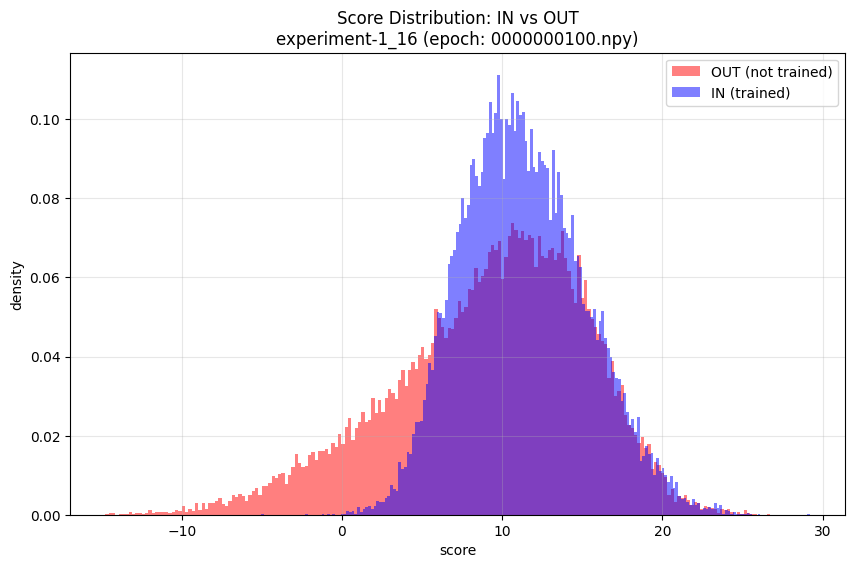

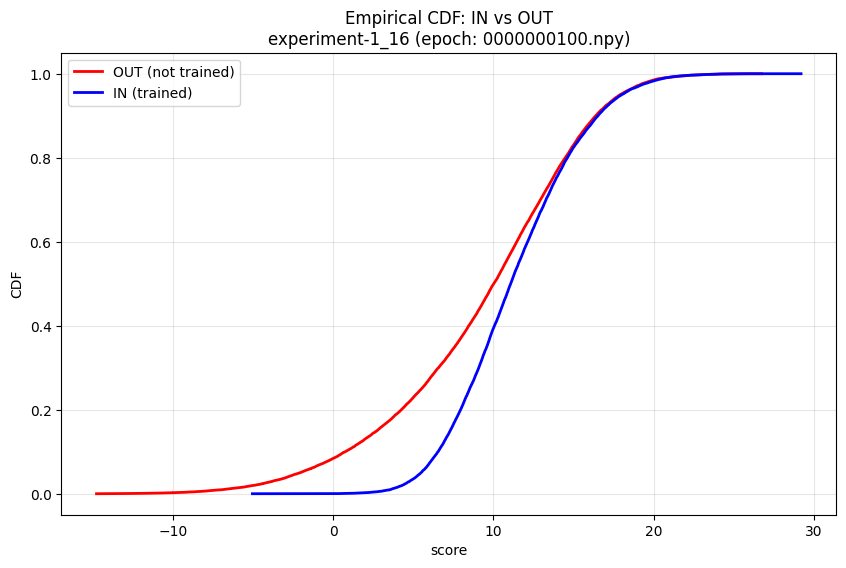


Processing: experiment-2_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=25079/50000
  IN (trained):  25079 samples, mean=11.0830, std=3.6933
  OUT (not trained): 24921 samples, mean=8.9918, std=5.9868


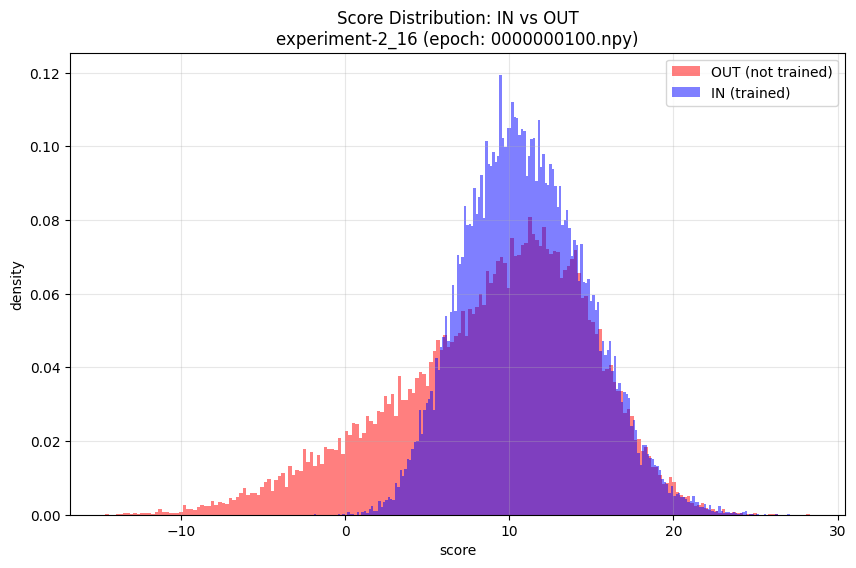

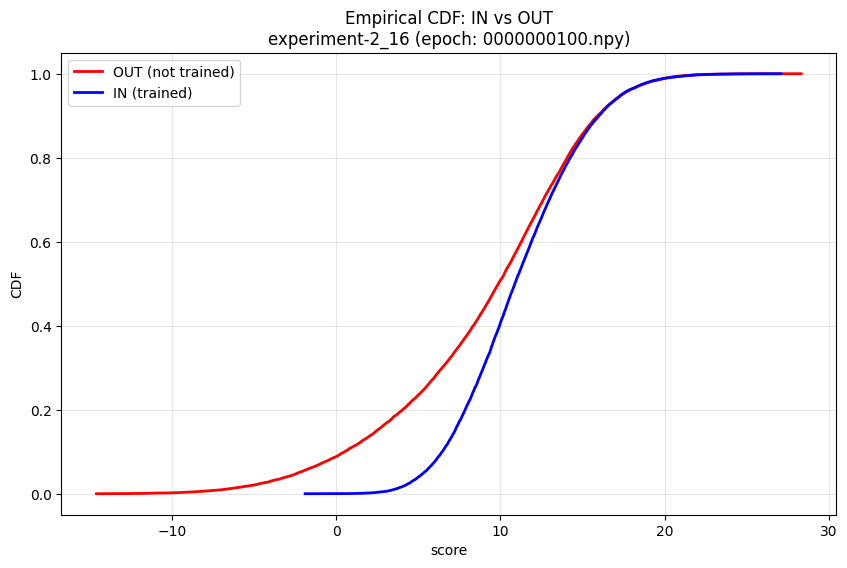


Processing: experiment-3_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=25088/50000
  IN (trained):  25088 samples, mean=11.2269, std=3.8893
  OUT (not trained): 24912 samples, mean=9.0856, std=6.2020


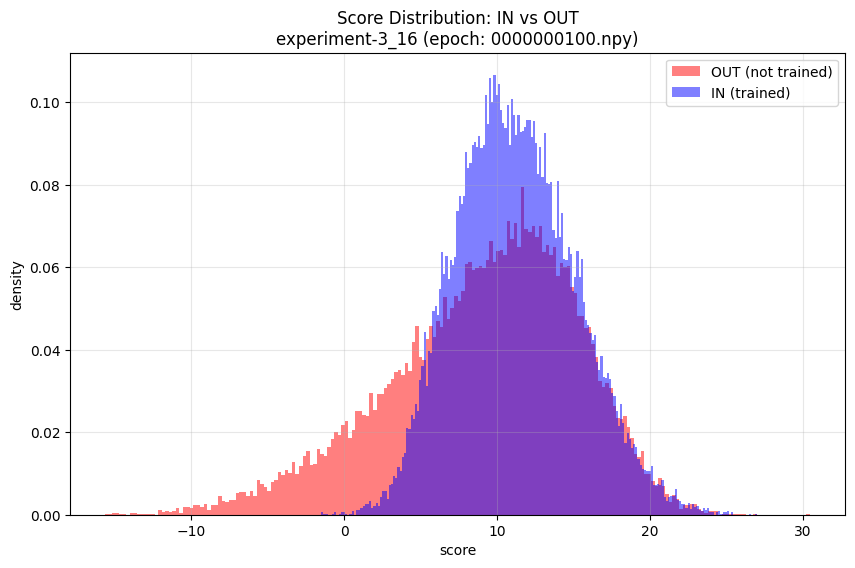

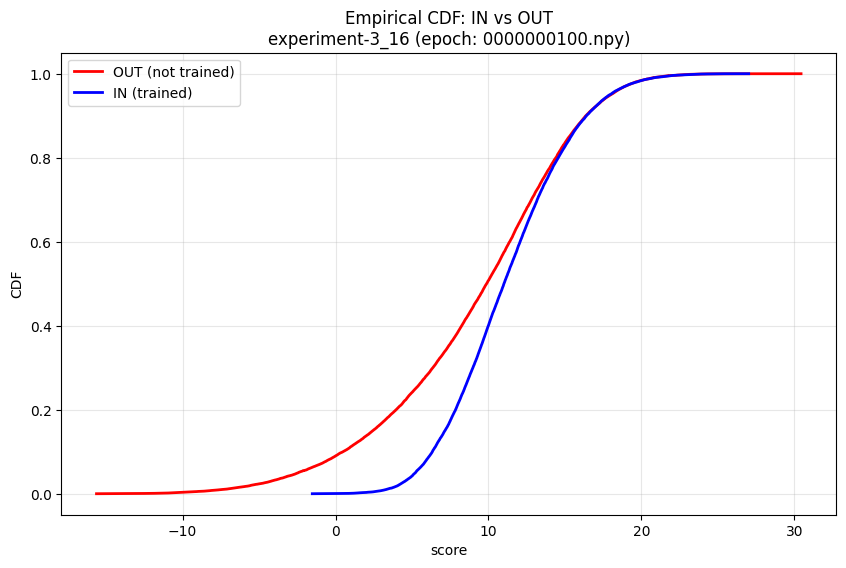


Processing: experiment-4_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=24829/50000
  IN (trained):  24829 samples, mean=11.2370, std=3.7724
  OUT (not trained): 25171 samples, mean=9.1317, std=6.1046


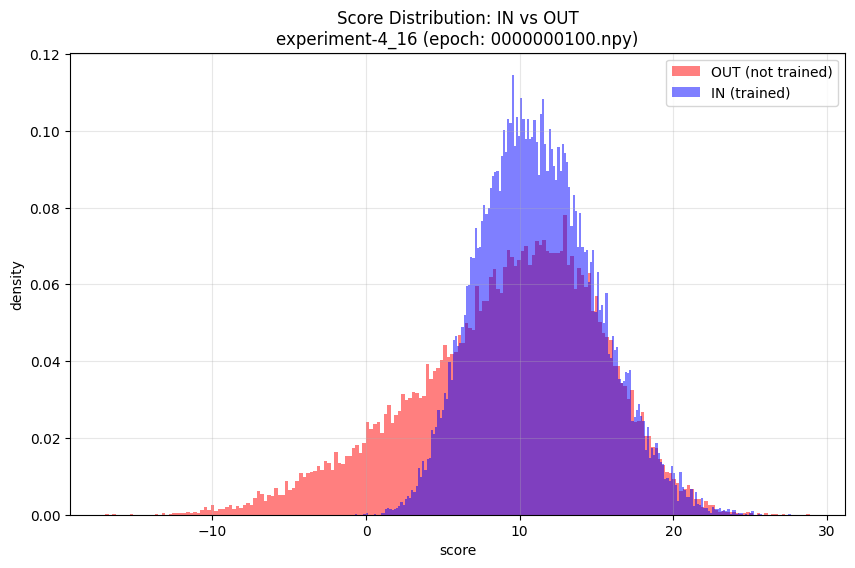

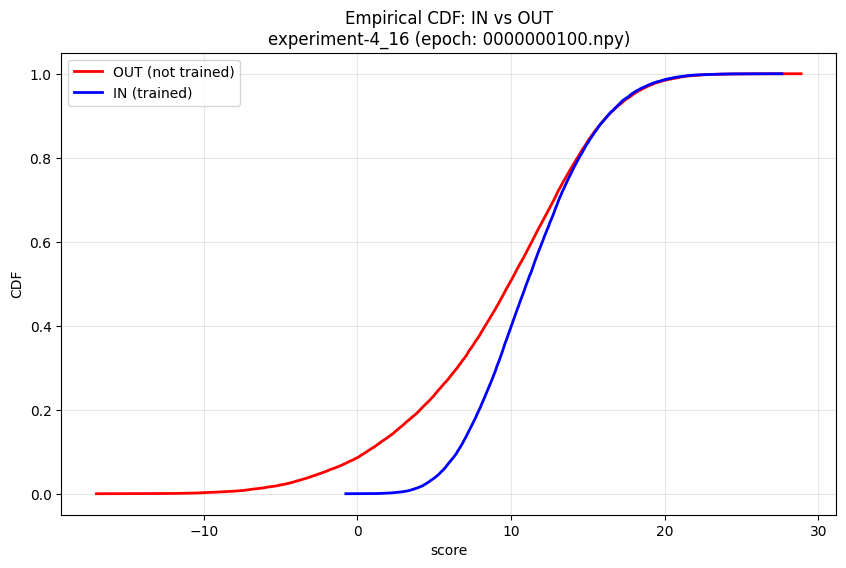


Processing: experiment-5_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=25089/50000
  IN (trained):  25089 samples, mean=11.1930, std=3.9160
  OUT (not trained): 24911 samples, mean=9.0463, std=6.1812


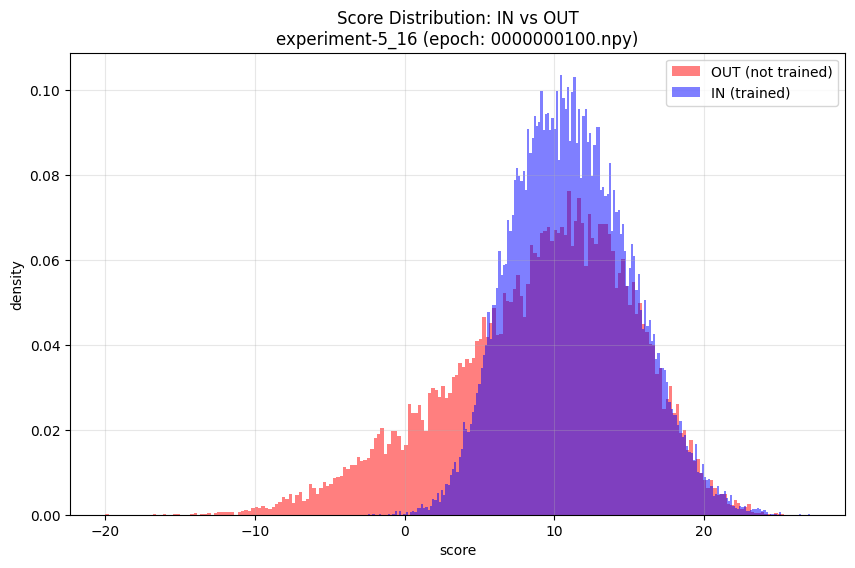

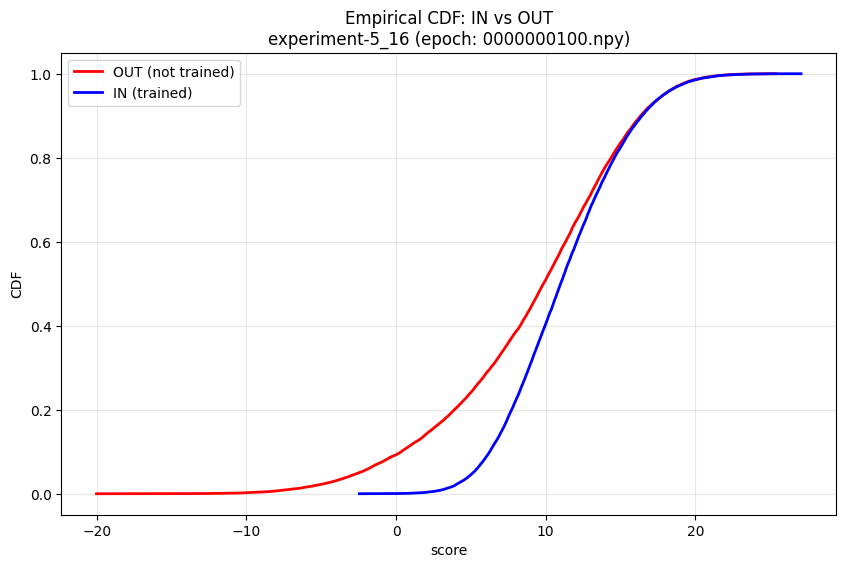


Processing: experiment-6_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=24902/50000
  IN (trained):  24902 samples, mean=11.1997, std=3.9462
  OUT (not trained): 25098 samples, mean=9.0602, std=6.2266


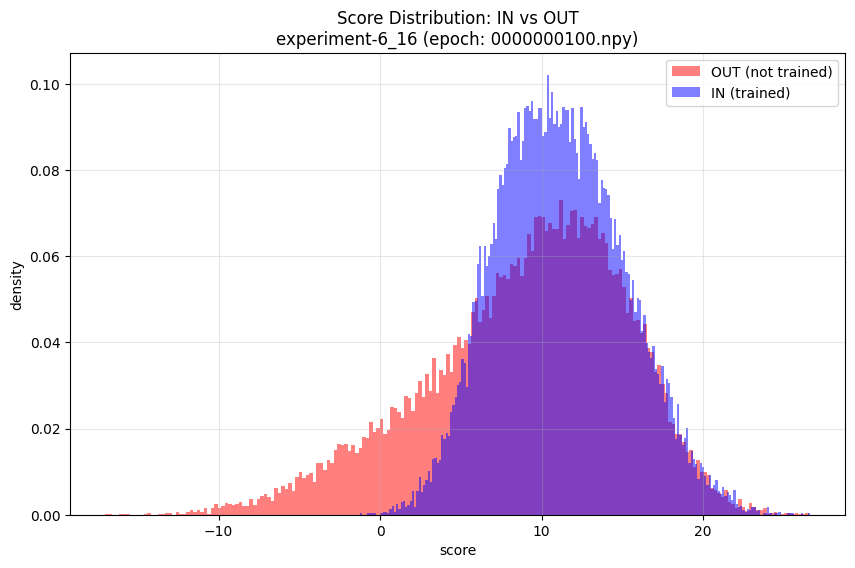

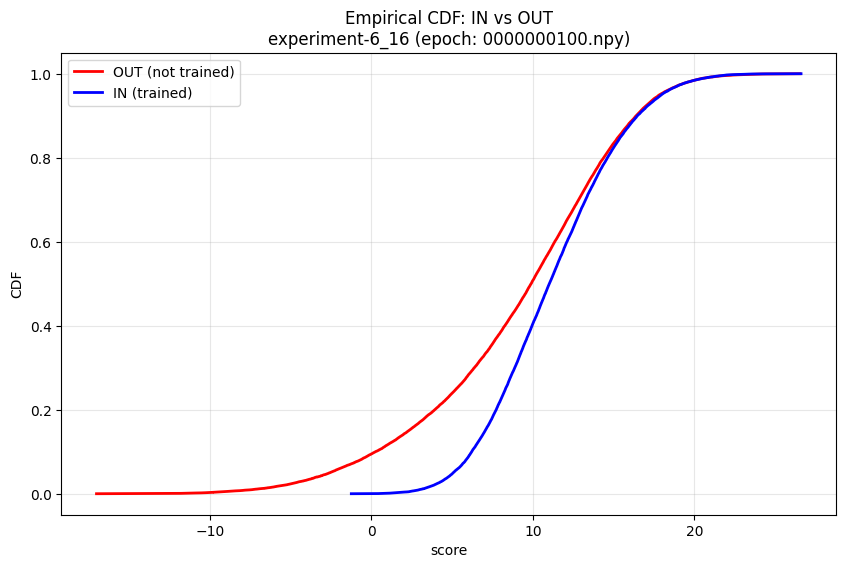


Processing: experiment-7_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=25152/50000
  IN (trained):  25152 samples, mean=11.3487, std=3.9603
  OUT (not trained): 24848 samples, mean=9.2726, std=6.1714


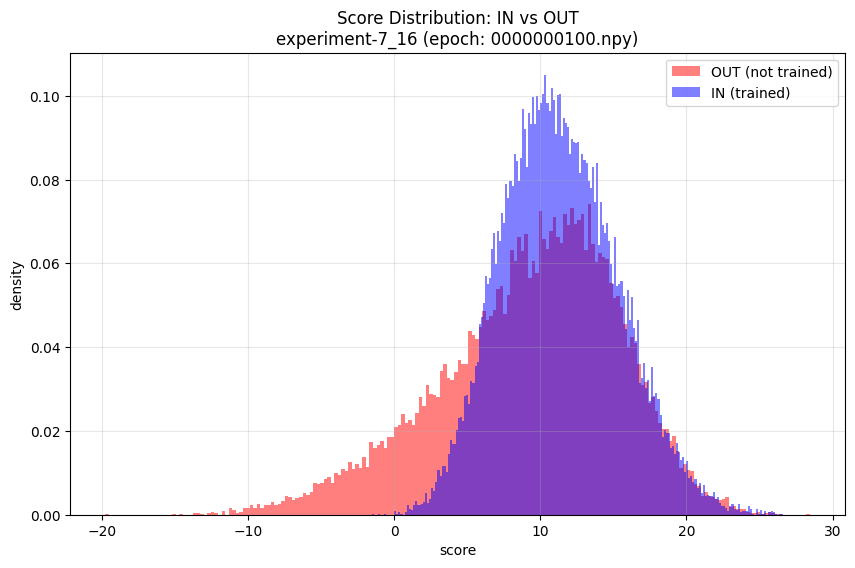

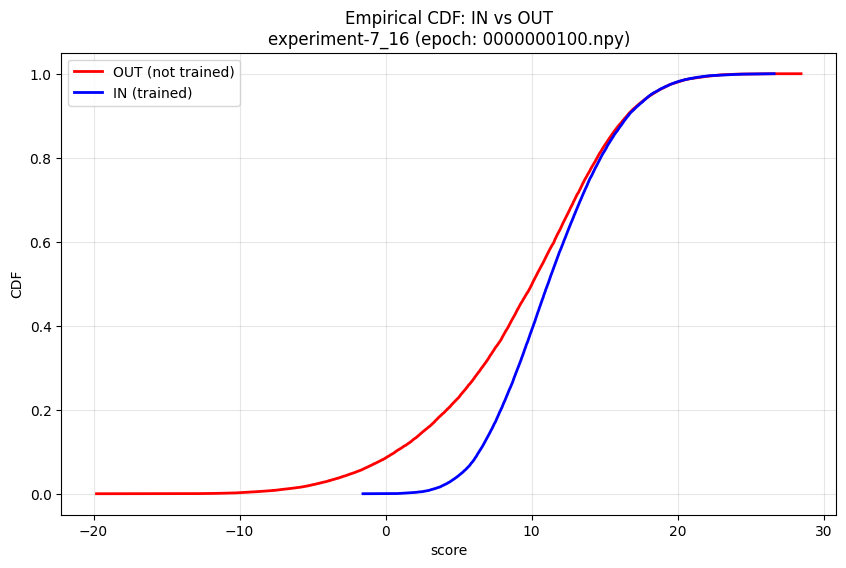


Processing: experiment-8_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=24872/50000
  IN (trained):  24872 samples, mean=11.3999, std=3.8625
  OUT (not trained): 25128 samples, mean=9.1701, std=6.2292


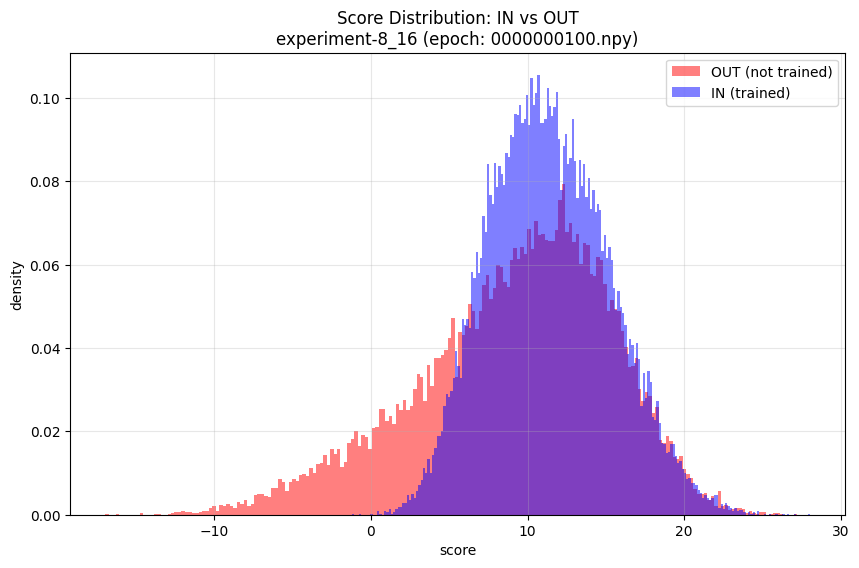

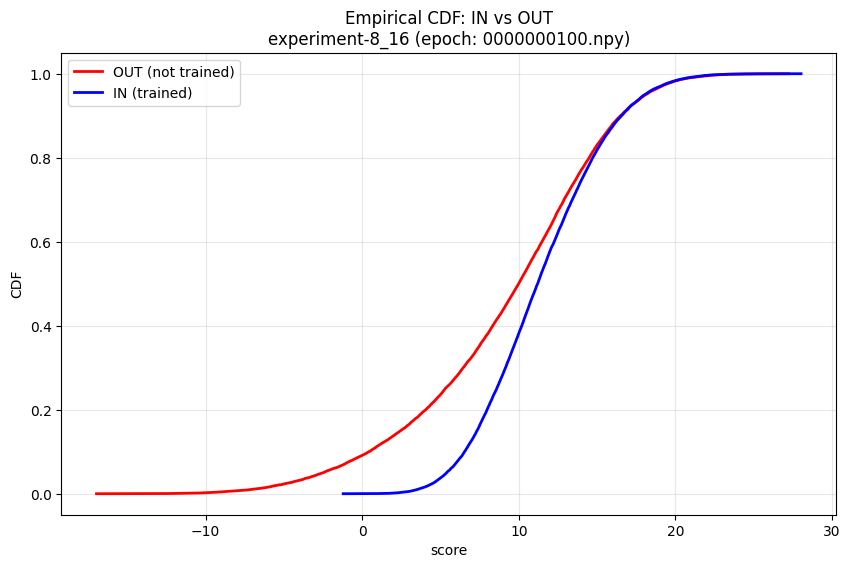


Processing: experiment-9_16
  keep.shape=(50000,), scores.shape=(50000, 2), kept=25073/50000
  IN (trained):  25073 samples, mean=11.3205, std=3.7984
  OUT (not trained): 24927 samples, mean=9.2353, std=6.0567


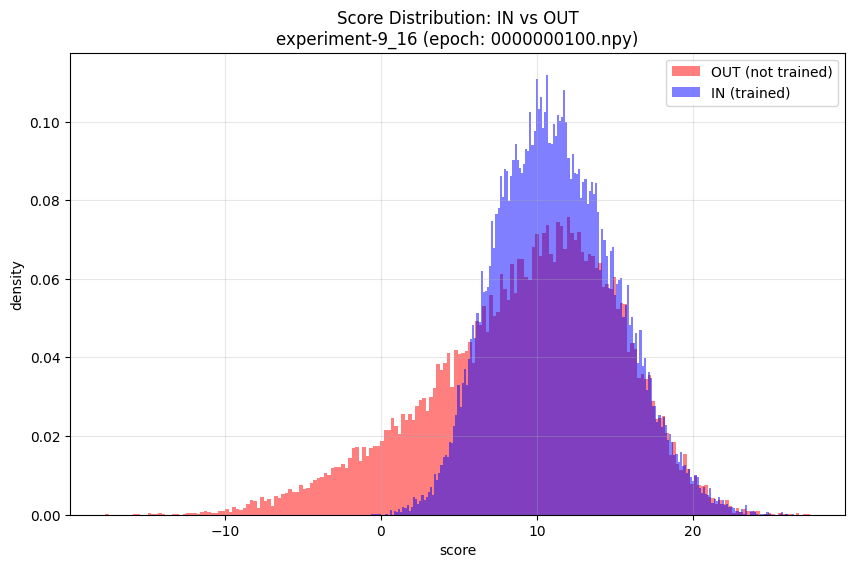

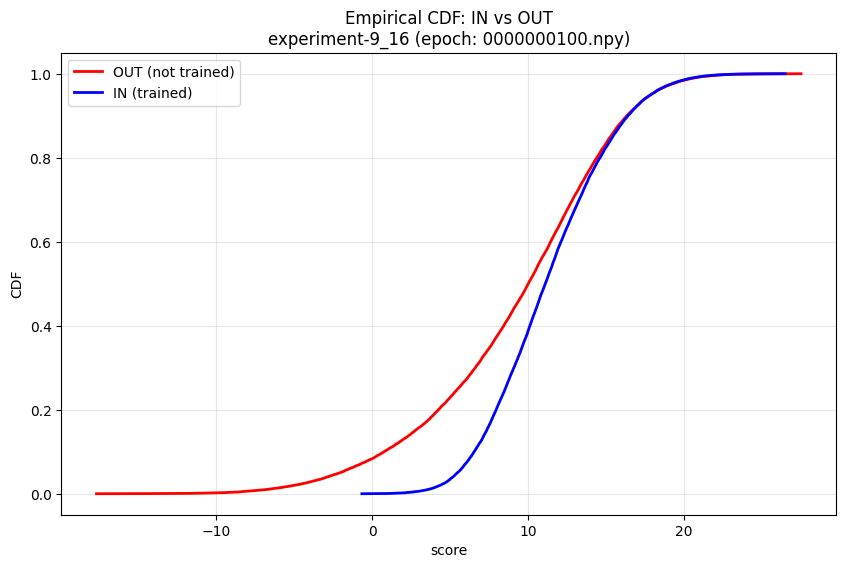


✅ Completed plotting for all shadow models


In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# Plot Parameters - Set these directly
# ============================================================================
dataset = 'cifar10'
base_logdir = os.path.join(logs_dir, 'exp', dataset)
regex_pattern = '.*experiment.*'  # Pattern to match experiment directories
epoch = "0000000100.npy"  # Epoch to plot

# ============================================================================
# Helper Function for Plotting
# ============================================================================

def ecdf(x):
    """Compute empirical cumulative distribution function."""
    x = np.sort(x)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

def plot_score_distribution(s_in, s_out, exp_dir, epoch):
    """
    Plot score distributions for a single shadow model.
    
    Args:
        s_in: Scores for samples that were IN (trained on)
        s_out: Scores for samples that were OUT (not trained on)
        exp_dir: Experiment directory name
        epoch: Epoch identifier
    """
    # 1) Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(s_out, bins=200, alpha=0.5, density=True, label="OUT (not trained)", color='red')
    plt.hist(s_in,  bins=200, alpha=0.5, density=True, label="IN (trained)", color='blue')
    plt.legend()
    plt.title(f"Score Distribution: IN vs OUT\n{exp_dir} (epoch: {epoch})")
    plt.xlabel("score")
    plt.ylabel("density")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 2) Empirical CDF
    x_out, y_out = ecdf(s_out)
    x_in,  y_in  = ecdf(s_in)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_out, y_out, label="OUT (not trained)", color='red', linewidth=2)
    plt.plot(x_in,  y_in,  label="IN (trained)", color='blue', linewidth=2)
    plt.legend()
    plt.title(f"Empirical CDF: IN vs OUT\n{exp_dir} (epoch: {epoch})")
    plt.xlabel("score")
    plt.ylabel("CDF")
    plt.grid(True, alpha=0.3)
    plt.show()

# ============================================================================
# Load Scores and Generate Plots for Each Shadow Model
# ============================================================================

# Get all experiment directories matching the pattern
experiment_dirs = sorted([d for d in os.listdir(base_logdir) 
                          if os.path.isdir(os.path.join(base_logdir, d))])
matching_dirs = [d for d in experiment_dirs if re.search(regex_pattern, d)]

print("=" * 80)
print(f"Generating plots for {len(matching_dirs)} shadow models")
print(f"Base directory: {base_logdir}")
print(f"Epoch: {epoch}")
print("=" * 80)

# Process each shadow model and generate plots
for exp_dir in matching_dirs:
    exp_path = os.path.join(base_logdir, exp_dir)
    
    # Load keep mask
    keep_path = os.path.join(exp_path, "keep.npy")
    scores_path = os.path.join(exp_path, "scores", epoch)
    
    if not os.path.exists(keep_path):
        print(f"⚠️  Skipping {exp_dir}: keep.npy not found")
        continue
    
    if not os.path.exists(scores_path):
        print(f"⚠️  Skipping {exp_dir}: scores/{epoch} not found")
        continue
    
    # Load keep mask and scores
    keep = np.load(keep_path).astype(bool)
    scores = np.load(scores_path)
    
    print(f"\n{'='*80}")
    print(f"Processing: {exp_dir}")
    print(f"  keep.shape={keep.shape}, scores.shape={scores.shape}, kept={keep.sum()}/{len(keep)}")
    
    # Reduce augmentation dimension if present
    # Scores can be (N,) or (N, num_augs) - take mean over augmentation dimension
    if scores.ndim == 2:
        s_scalar = scores.mean(axis=1)   # (N,)
    else:
        s_scalar = scores
    
    # Ensure keep mask matches scores length
    if len(keep) != len(s_scalar):
        print(f"⚠️  {exp_dir}: keep length ({len(keep)}) != scores length ({len(s_scalar)}), skipping")
        continue
    
    # Split scores by IN/OUT
    s_in = s_scalar[keep]      # Samples that were IN (trained on)
    s_out = s_scalar[~keep]    # Samples that were OUT (not trained on)
    
    print(f"  IN (trained):  {len(s_in)} samples, mean={s_in.mean():.4f}, std={s_in.std():.4f}")
    print(f"  OUT (not trained): {len(s_out)} samples, mean={s_out.mean():.4f}, std={s_out.std():.4f}")
    print(f"{'='*80}")
    
    # Generate plots for this model
    plot_score_distribution(s_in, s_out, exp_dir, epoch)

print("\n" + "=" * 80)
print(f"✅ Completed plotting for all shadow models")
print("=" * 80)
